<a href="https://colab.research.google.com/github/limsonghwan/2020_ML_titanic/blob/master/%5BML%5Dkaggle_titanic_shit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Titanic Challenge
## 탑승자의 생존 여부를 예측해보자!
본 챌린지는 동일하게 주어진 데이터 셋을 이용하여 탑승자의 생존여부를 예측하는 챌린지이다.  
.  
.  
시작하기 전에 항상 동일한 결과를 위해 random seed를 지정해준다. 값은 생일을 이용한다.


In [163]:
import random
random.seed(822)

# 1. 데이터 받아오기
kagggle에서 챌린지 진행에 필요한 데이터를 받아온다.  
본 데이터를 kaggle의 api를 이용하여 받아올 수도 있지만, 직접 csv파일을 다운로드 받아 이용하였다.  
.  
먼저 pandas를 이용하여 train과 test data frame을 만든다.


In [164]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [165]:
import pandas as pd

train = pd.read_csv('/content/drive/My Drive/ML/train.csv')
test = pd.read_csv('/content/drive/My Drive/ML/test.csv')

# 2. 데이터 확인하기


## 2-1 데이터 구조 파악
head() 메소드를 통해 데이터를 확인해 보았다.  

In [166]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



본 데이터는 	PassengerId,	Survived,	Pclass,	Name,	Sex,	Age,	SibSp,	Parch,	Ticket,	Fare,	Cabin,	Embarked를 Feature로 갖는다.


*   Survived: 0 = 아니오, 1 = 예
*   pclass: 객실 클래스 / 1 = 1등석, 2 = 2등석, 3 = 3등석 
*   Name : 탑승자 이름
*   Sex : 탑승자 성별
*   Age : 탑승자 나이
*   pclass: 티켓 클래스 / 1 = 1위, 2 = 2위, 3 = 3위
*   SibSp: 타이타닉호에 탑승한 형제/배우자 수
*   parch: 타이타닉호에 승선한 부모/아이들의 수
*   TIcket: 티켓 번호
*   Fare : 여객운임
*   Cabin: 객실 번호
*   Embarked: 탑승 항만 / C = 체르부르, Q = 퀸스타운, S = 사우샘프턴

Feature를 확인해보니 몇가지 Feature들은 예측에 큰 도움이 되지 않을것으로 예상된다.


## 2-2 데이터 크기 파악
train 데이터 셋과 test 데이터셋이 얼마나 많은 샘플을 가지고 있는지 shape을 이용하여 확인한다. 

In [167]:
train.shape

(891, 12)

In [168]:
test.shape

(418, 11)

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 2-3 Missing Value 확인하기
info 메소드를 이용하여 데이터에 얼마나 많은 missing value가 있는지 확인한다.

In [171]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [172]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64



missingno를 import하여 시각적으로 Missing Value를 표현하였다.

In [173]:
import missingno as msno

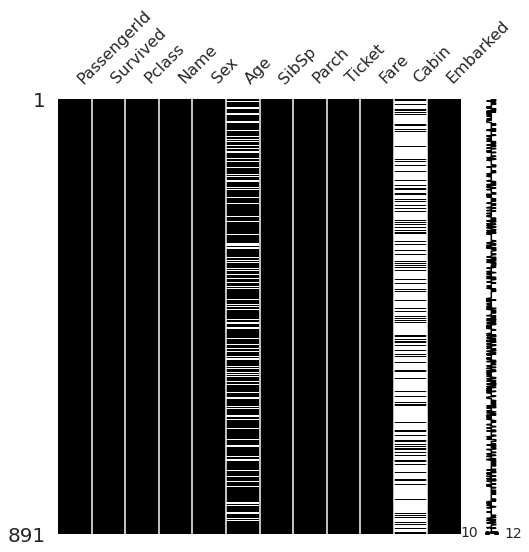

In [174]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0, 0, 0))

Age, Cabin의 데이터의 많은 Missing Value가 있는것을 확인할 수 있다.  
학습 전 전처리 과정에서 해당 Missing Value에 대한 처리가 필요할 것으로 예상된다.  
Age의 경우 비어있는 Value가 많지만 median이나 mean을 통해 채우면 활용할 수 있을것 같은 반면 Cabin의 경우 데이터가 없다시피 하는 수준으로 채운다고 하더라도 크게 의미있는 결과를 기대하긴 힘들어 보이므로 그냥 탈락 시키도록 한다.

## 2-4 데이터 plot 해보기
Pclass, Sex,	Age,	SibSp,	Parch,	Fare,	Embarked 데이터들의 히스토그램이나, 생존여부와의 관계를 파악해 전처리 시 참고하도록 한다.  



### Pclass
객실 등급은 생존에 영향을 주었을 것으로 예측된다.  
pandas에 내장되어 있는 crosstab을 통해 쉽게 확인이 가능하다.

In [175]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


단순히 생존자의 수만을 보았을 때, 3등석 탑승객이 가장 많이 살아남았다. 그러나 비율상으로는 1등급 승객이 더 많이 살아남은 것으로 보인다.  
.  

숫자로 된 데이터이긴 하지만 원핫 인코딩 등의 처리가 필요할지도 모르겠다.  
우선 데이터 그대로 한번 돌려보고 수정이 필요하다면 수정을 할 계획이다.

### Sex
타이타닉등 재난영화를 보면 보통 남성보다는 여성이 대피의 우선순위이므로 생존율의 영향을 미쳤을것으로 생각된다. 

In [176]:
pd.crosstab(train['Sex'], train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


실제로 남성의 수가 더 많음에도 불구하고 생존자는 여성이 더 많은 것을 볼 수 있다.  
데이터가 string으로 이루어져 있으므로 전처리를 통해 0,1로 바꿔줄 예정이다.

### Age
영화를 보면 노인과 아이도 대피의 우선순위이므로 나이도 영향을 미쳤을 것이다. 나이별 생존/사망 비율을 나타내었다.  
.  
깔끔한 plot을 위해 seaborn의 도움을 받아본다.

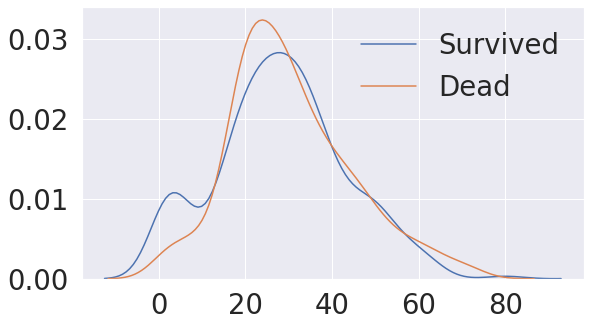

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=2.5)

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

plot한 분포도를 보면 20~30대가 탑승객의 주를 이루고 있으며 Survived와 Dead의 그래프가 얼추 겹치는걸 보면 의외로 살 확률이 반반 정도 된 것 같다. age가 생각보다 큰 importance를 가지지 않을 수 도 있을 것 같다.

### SibSp
자주 접하지 못했던 Feature라 잘 모르겠으니 plot해 보도록 한다.

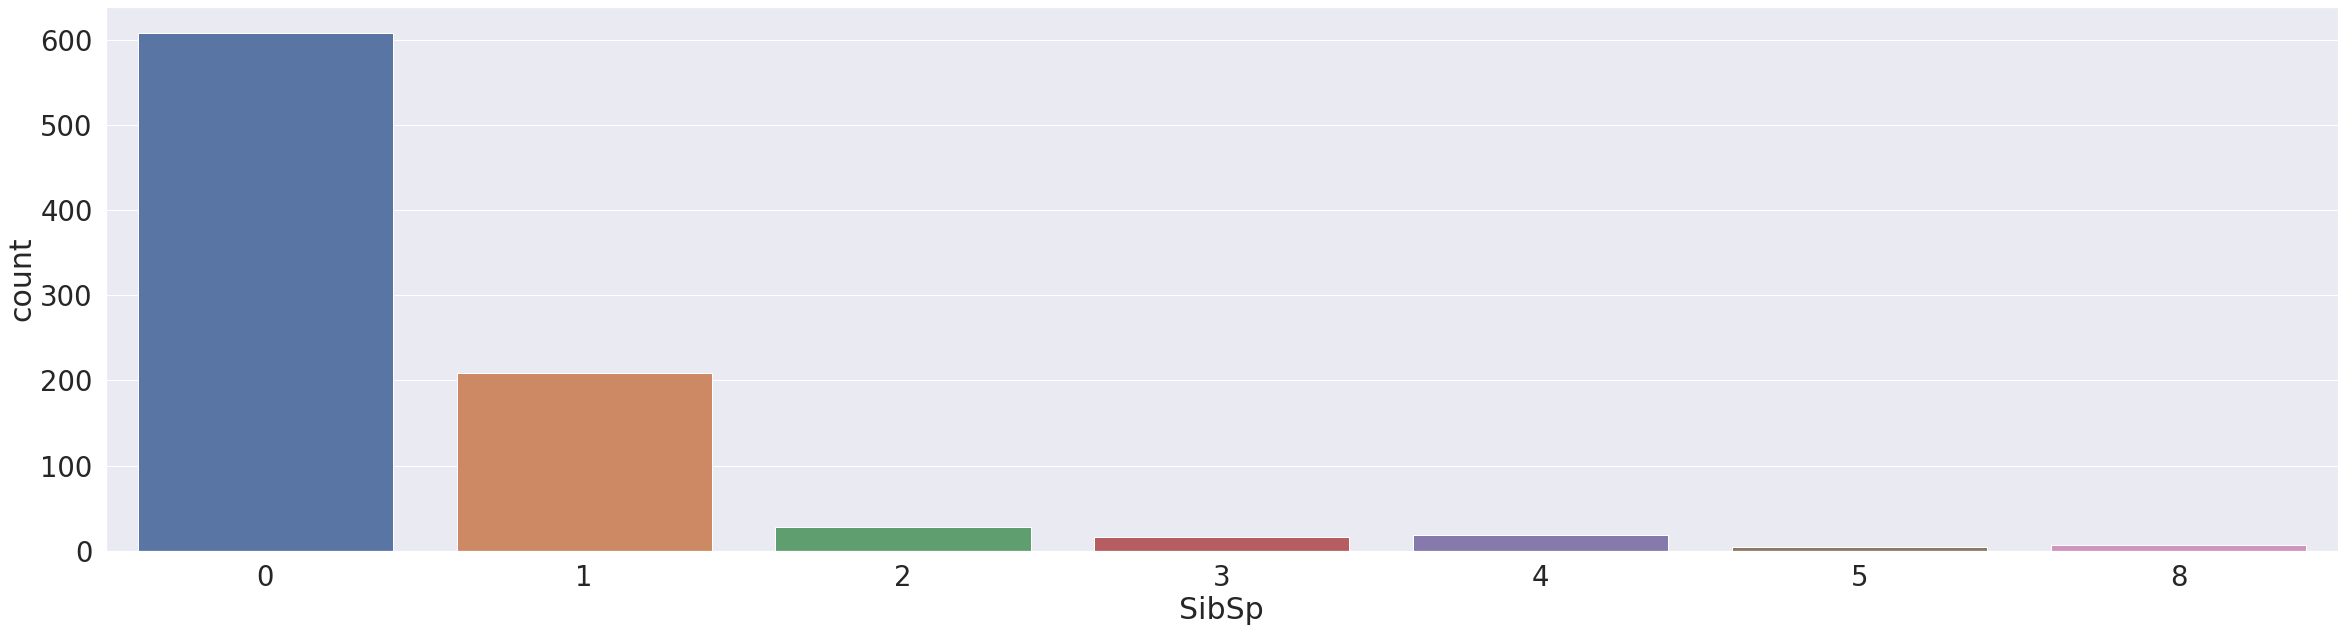

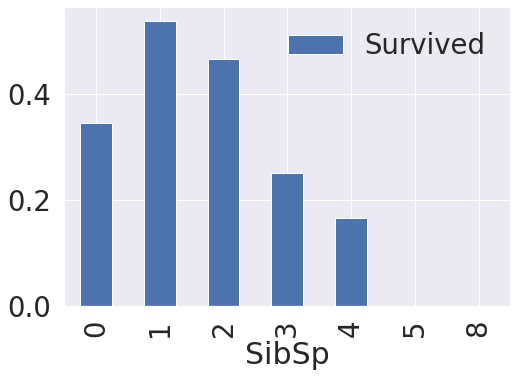

In [178]:
f,ax=plt.subplots(1, 1, figsize=(40,10))
sns.countplot('SibSp', data=train)

train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='SibSp', ascending=True).plot.bar()


plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Parch
이것도 생소하다. 자세히 들여다 본다.


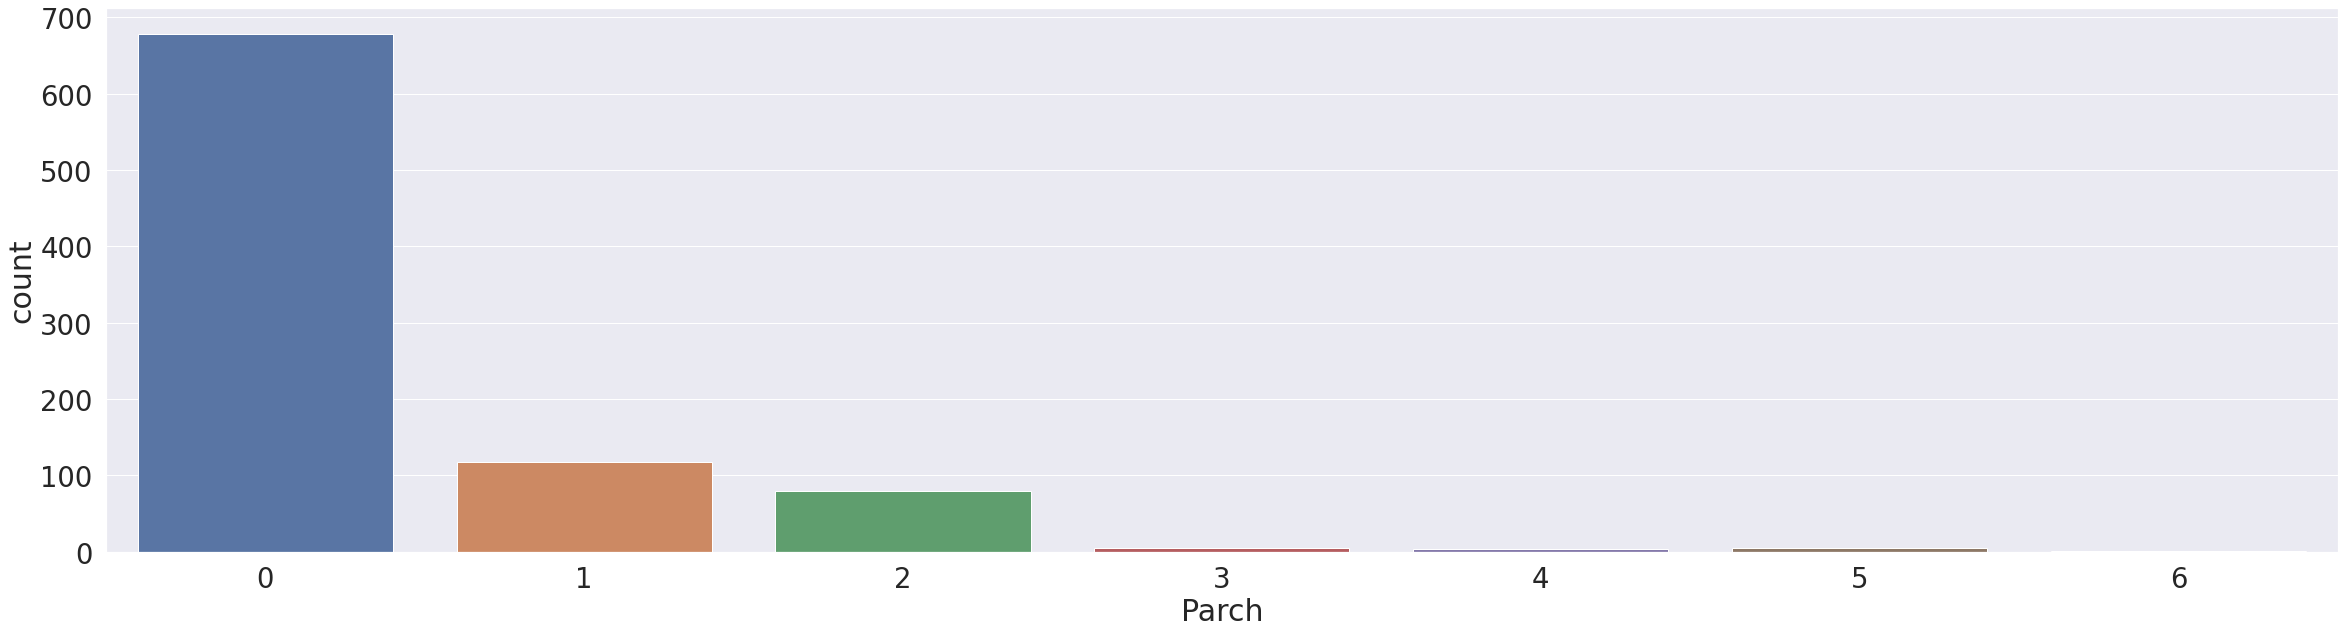

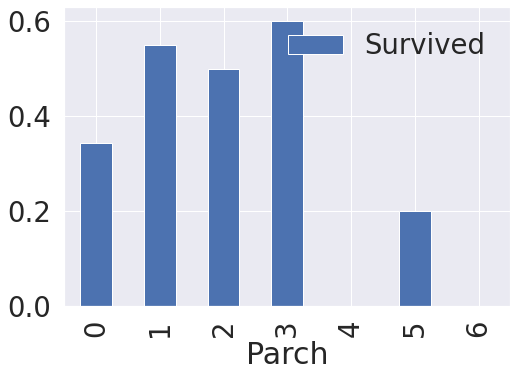

In [179]:
f,ax=plt.subplots(1, 1, figsize=(40,10))
sns.countplot('Parch', data=train)

train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Parch', ascending=True).plot.bar()


plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Fare
Fare의 경우 연속적인 Feature이므로 히스토그램을 통해 확인한다.

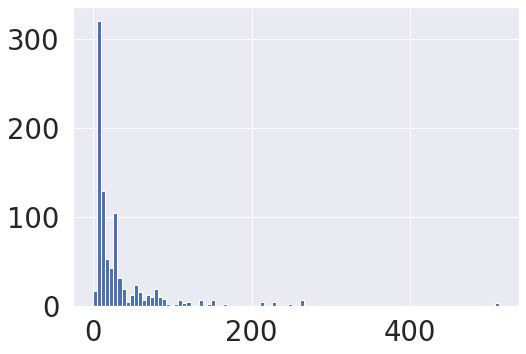

In [180]:
train['Fare'].hist(bins=100)

왼쪽으로 굉장히 치우친 모습이 보인다. standardization이 필요할것 같다.

### Embarked
예측에 큰 영향을 줄 수 없을것 같은 예상이 되지만 살펴본다.

In [181]:
pd.crosstab(train['Embarked'], train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


이 데이터는 string데이터 이므로 인코딩을 통해 숫자로 바꾸어줄 예정이다.

### Plot하지 않은 Feature 들


#### Name
말 그대로 이름이 적힌 Feature이다. string이라 모델에 입력도 안되고 이름과 생존은 큰 연관관계가 없을 것이라 판단하여 다루지 않았다.



#### Ticket
Ticket은 보통 특정한 규칙을 가지고 그 식별번호가 정해진다. 이를 활용하여 Feature를 잘 추출하면 이용할 수 있을 것 같지만, 공개된 규칙이 없고 데이터 마이닝을 통해 규칙을 찾아 내기 위한 아이디어 또한 없어 우선 다루지 않았다.



#### Cabin
Value가 NaN인 값들이 너무 많아 이후 전처리 과정에서 drop할 예정이라 다루지 않았다.

# 3. 데이터 전처리 하기


In [182]:
# train = pd.read_csv('/content/drive/My Drive/ML/train.csv')
# test = pd.read_csv('/content/drive/My Drive/ML/test.csv')

## 3-1 Missing Value 처리하기 

#### Column 삭제하기
Cabin column의 경우 너무 많은 missing Value가 존재하므로 행 전체를 삭제한다.
.  
<삭제 전>

In [183]:
import numpy as np
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<삭제 후> 'Cabin'이 출력되지 않는 것을 볼 수 잇다.

In [184]:
train.drop('Cabin', axis=1,inplace=True)
test.drop('Cabin', axis=1,inplace=True)
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


Name,Ticket은 string 열이지만 따로 처리하지 않을 것이므로 학습에 이용하지 못한다. 따라서 삭제한다.

In [185]:
train.drop('Name', axis=1,inplace=True)
test.drop('Name', axis=1,inplace=True)
train.drop('Ticket', axis=1,inplace=True)
test.drop('Ticket', axis=1,inplace=True)
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


#### row 삭제하기
train set의 Embarked 에서 값이 존재하지 않는 경우가 있는데 이는 해당 데이터가 없는 row를 제거하여 해결하도록 한다

In [186]:
import numpy as np
train.dropna(subset=['Embarked'],inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

#### 값 Input 하기
Age의 경우 많은 값이 비긴 하지만 inputer를 이용하여 비어있는 값을 채우면 학습에 이용할 수 있을것으로 판단되어 missing value를 채우도록 한다.  

.  
비어있는 값은 median으로 채우고자 한다.

In [187]:
train_Age_median = train['Age'].median()
train['Age'].fillna(train_Age_median, inplace = True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [188]:
test_Age_median = test['Age'].median()
test['Age'].fillna(test_Age_median, inplace = True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [189]:
test_Fare_median = test['Fare'].median()
test['Fare'].fillna(test_Fare_median, inplace = True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## 3-2 인코딩 하기
위에서 데이터를 확인한 결과, Value가 string으로 이루어진 데이터들이 있다. 따라서 이를 카테고리로 만드는 작업이 필요하다.  
ex) Sex, Embarked

In [192]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#### "Sex" Encoding
'Sex' Column을 
Male = 1, Female = 0로 encoding한다.

*   Male = 1
*   Female = 0



In [193]:
result = encoder.fit_transform(train['Sex'])
train['Sex']=result

In [194]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [195]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


0과 1로 인코딩 된 것을 확인할 수 있다.


*   female = 0
*   male = 1



In [196]:
result = encoder.fit_transform(test['Sex'])
test['Sex']=result

#### "Embarked" Encoding
'Embarked' Column을 
S = 2, C = 0, Q = 1로 encoding한다.

*  C = 0
*  Q = 1
*  S = 2

In [197]:
result = encoder.fit_transform(train['Embarked'])
train['Embarked']=result

In [198]:
result = encoder.fit_transform(test['Embarked'])
test['Embarked']=result

In [199]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## 3-3 Standardization
Fare 특성의 표준화를 진행한다.

In [200]:
np.mean(train['Fare']), np.std(train['Fare'])

(32.09668087739029, 49.669545099689614)

In [201]:
train_fare = np.asanyarray(train['Fare'])
X = (train_fare.reshape(-1, 1) )
pd.DataFrame(X).describe()

,0
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(1.3987061727561027e-16, 1.0)

In [203]:
train['Fare']=X_scaled
np.mean(train['Fare']), np.std(train['Fare'])

(1.0921147750671535e-16, 0.999999999999999)

test set진행

In [204]:
test_fare = np.asanyarray(test['Fare'])
Y = (test_fare.reshape(-1, 1) )

scaler = StandardScaler()
scaler.fit(Y)
Y_scaled = scaler.transform(Y)

test['Fare']=Y_scaled


In [205]:
np.mean(test['Fare']), np.std(test['Fare'])

(8.154030348323518e-17, 0.9999999999999998)

## 3-4 data set split
Train data set중 'survived'를 label로 따로 나누어 label과 input 데이터 셋으로 나눈다.


In [206]:
y_train = train['Survived'].values
x_train = train.drop(['Survived','PassengerId'], axis=1).values
x_test = test.drop('PassengerId', axis=1).values

In [207]:
#from sklearn.model_selection import train_test_split
#X_tr, X_vld, y_tr, y_vld = train_test_split(x_train, y_train, test_size=0.3, random_state=822)

# 4. Modeling
이번 챌린지는 classification이므로 SVM등의 다양한 모델을 이용할 수 있다. 


*   Decision Tree
*   SVM
*   Ramdom Forest  

위의 대표적인 classifier를 이용하여 학습하고 교차검증을 통해 평가해본다.



In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

## 4-1 Cross Validation (K-fold)

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 4-2 Decision Tree

In [211]:
decision_clf = DecisionTreeClassifier()
decision_clf.fit( x_train, y_train)
decision_predict=decision_clf.predict(x_train)
decision_error=metrics.accuracy_score(decision_predict, y_train)
print(decision_error)

0.9797525309336333


In [212]:
scoring = 'accuracy'
decision_score = cross_val_score(decision_clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(decision_score)

[0.73033708 0.75280899 0.82022472 0.76404494 0.7752809  0.83146067
 0.82022472 0.71910112 0.83146067 0.80681818]


In [213]:
np.mean(decision_score)

0.7851762002042901

### Decision Tree 결과


*   Training accuracy = 1.0
*   cross_val_score(mean)=0.7659729315628192
다소 __오버피팅__ 된 것으로 판단된다.



## 4-3 SVM

In [214]:
svm_clf = SVC()
svm_clf.fit( x_train, y_train)
svm_predict=svm_clf.predict(x_train)
svm_error=metrics.accuracy_score(svm_predict, y_train)
print(svm_error)

0.6839145106861643


In [215]:
scoring = 'accuracy'
svm_score = cross_val_score(svm_clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(svm_score)

[0.64044944 0.60674157 0.69662921 0.68539326 0.6741573  0.66292135
 0.70786517 0.62921348 0.70786517 0.64772727]


In [216]:
np.mean(svm_score)

0.6658963227783452

### SVM 결과


*   Training accuracy = 0.6175478065241845
*   cross_val_score(mean)=0.6174923391215525 
__언더피팅__ 된 것으로 판단된다.
.  
해당 모델은 성능이 다소 모자르다고 판단하여 탈락시킨다.

## 4-4 Ramdom Forest

In [217]:
Forest_clf = RandomForestClassifier(n_estimators=13)
Forest_clf.fit( x_train, y_train)
Forest_predict=Forest_clf.predict(x_train)
Forest_error=metrics.accuracy_score(Forest_predict, y_train)
print(Forest_error)

0.9730033745781778


In [218]:
scoring = 'accuracy'
Forest_score = cross_val_score(Forest_clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(Forest_score)

[0.71910112 0.7752809  0.86516854 0.80898876 0.86516854 0.83146067
 0.85393258 0.71910112 0.84269663 0.88636364]


In [219]:
np.mean(Forest_score)

0.8167262512768131

### Ramdom Forest 결과


*   Training accuracy = 0.9921259842519685
*   cross_val_score(mean)=0.8143769152196118  
다소 __오버피팅__ 된 것으로 판단된다.
.  
Random forest가 결국 Decision Tree를 이용하는 것이기는 하나 하이퍼 파라미터 튜닝에서는 Decision tree와 Random forest 모두 튜닝해 성능을 비교한다.

# 5. 하이퍼 파라미터 튜닝
모델의 하이퍼 파라미터를 튜닝하여 보다 강력한 모델을 만들어 보자.  
수정해야할 하이퍼 파라미터가 많으므로 단순 grid방식보단 random search를 이용한다.  
학습을 여러본 해본 결과 iteration 값이 크다고 무조건 좋은 값이 나오지 않음을 알 수 있었다. 과도한 iteration값은 오히려 계산시간만 늘리고 일정 수준 이상의 정확도를 넘어서는 성능은 보이지 못했다. 


In [220]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

## 5-1 Decision Tree
Decision Tree의 하이퍼 파라미터를 튜닝한다. 튜닝할 수 있는 파라미터들을 확인한다.

In [221]:
print('Parameters currently in Decision:\n')
pprint(decision_clf.get_params().keys())

Parameters currently in Decision:

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


하이퍼 파라미터의 풀을 지정한다.

In [222]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
max_features =[int(x) for x in range(0,10)]
max_leaf_nodes=[int(x) for x in np.linspace(10, 200, num = 20)]
min_samples_leaf = [int(x) for x in range(0,10)]
splitter = ['best','random']
class_weight=['balanced','balanced_subsample',None]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'splitter':splitter,
               'class_weight':class_weight}
pprint(random_grid)

{'class_weight': ['balanced', 'balanced_subsample', None],
 'max_depth': [10,
               15,
               20,
               25,
               31,
               36,
               41,
               46,
               52,
               57,
               62,
               67,
               73,
               78,
               83,
               88,
               94,
               99,
               104,
               110,
               None],
 'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'splitter': ['best', 'random']}


In [223]:
dt_random = RandomizedSearchCV(estimator = decision_clf, param_distributions = random_grid, n_iter = 2000, cv = 10, n_jobs = -1,verbose=1)
dt_random.fit(x_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1030 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 10630 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:   27.3s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

최적의 파라미터 값들은 아래와 같다.

In [224]:
dt_random.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=78, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

기존 cross_val_score(mean)가 0.7659729315628192이였는데 아래 결과 값을 보면 0.8313074565883554으로 성능이 향상되었다.  
.  
본 출력 점수는 validation score중 가장 높은 값이라는 것 또한 고려해야한다.

In [225]:
dt_random.best_score_

0.8324310520939735

In [226]:
dt_best_estimator_pred=dt_random.best_estimator_.predict(x_train)
dt_best_estimator_error=metrics.accuracy_score(dt_best_estimator_pred, y_train)
print(dt_best_estimator_error)

0.8773903262092239


validation score보다 train의 score가 높긴 하지만 오버피팅이 확실히 줄어들었다.

## 5-2 Random Forest
Random Forest의 하이퍼 파라미터를 튜닝한다. 튜닝할 수 있는 파라미터들을 확인한다.

In [227]:
print('Parameters currently in Random Forest:\n')
pprint(Forest_clf.get_params())

Parameters currently in Random Forest:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 13,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


하이퍼 파라미터의 풀을 설정한다.

In [228]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
max_features: [int(x) for x in range(0,10)]
min_samples_split = [int(x) for x in range(0,10)]
min_samples_leaf = [int(x) for x in range(0,10)]
bootstrap = [True, False]
class_weight=['balanced','balanced_subsample',None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}
pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced', 'balanced_subsample', None],
 'max_depth': [10,
               15,
               20,
               25,
               31,
               36,
               41,
               46,
               52,
               57,
               62,
               67,
               73,
               78,
               83,
               88,
               94,
               99,
               104,
               110,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'n_estimators': [5,
                  10,
                  15,
                  20,
                  25,
                  30,
                  35,
                  40,
                  45,
                  50,
                  55,
                  60,
                  65,
                  70,
                  75,
                  80,
               

In [229]:
rf_random = RandomizedSearchCV(estimator = Forest_clf, param_distributions = random_grid, n_iter = 2000, cv = 10, n_jobs = -1,verbose=1)

In [230]:
rf_random.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 1648 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4848 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7048 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 9648 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 12648 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 15962 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 19762 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed: 19.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

아래는 결과값이 가장 높은 하이퍼 파라미터이다.

In [231]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=88, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [232]:
rf_random.best_score_

0.841394279877426

기존 cross_val_score(mean)가 0.8143769152196118였던 것에 비해 성능이 상승하기는 했지만 그 정도가 크지는 않다.  
.  
본 출력 점수는 validation score중 가장 높은 값이라는 것 또한 고려해야한다.

In [233]:
rf_best_estimator_pred=rf_random.best_estimator_.predict(x_train)
rf_best_estimator_error=metrics.accuracy_score(rf_best_estimator_pred, y_train)
print(rf_best_estimator_error)

0.9167604049493814


validation score보다 train의 score가 높긴 하지만 오버피팅도 어느정도 해소되었다.

# 6. 제출하기
이제 kaggle에 예측한 답을 올려 성능을 평가해보자


In [234]:
rf_test_pred=rf_random.best_estimator_.predict(x_test)
dt_test_pred=dt_random.best_estimator_.predict(x_test)

In [235]:
dt_answer = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':dt_test_pred})
rf_answer =pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':rf_test_pred})
rf_answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [236]:
dt_answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [237]:
dt_answer.to_csv('/content/drive/My Drive/ML/kaggle_titanic/dt_answer.csv', index=False)
rf_answer.to_csv('/content/drive/My Drive/ML/kaggle_titanic/rf_answer.csv', index=False)

Decision tree로 예측한 답은 0.74641, Randomforest로 예측한 답은 0.79186의 Score를 받았다. 생각보다 예측률이 낮게 나와서 아쉽다.  

# 7. 프로젝트를 진행하면서 느낀점
책에서 모델의 학습보다는 전처리에 더 많은 시간이 걸린다고 했던 것이 기억난다. 실제로도 전처리가 가장 오래걸렸던 것 같다. 또한 함수 몇줄만 이용하면 쉽게 모델을 구성하고 학습 시킬 수 있다는 사실이 놀라웠다.  
.  
사실 프로젝트를 진행하면서 다른 사람들은 어떻게 했었는지 굉장히 궁금해서 다른 사람들의 튜토리얼을 찾아보았는데, 많은 사람들이 PassengerName에서 Mr,Ms등을 추출해  Age의 Missing Value를 채우는 것을 보았다. 정말 창의적인 방법이라고 생각했다. 단순히 배운 방식만이 아닌 창의성이 들어가고 Feature Engneering을 통한 높은 성과를 얻는 것을 보면서 머신러닝에도 창의성이 필요하다는 것을 느꼈다.